# Example of using nc_particles code to read a nc_particles file.

This example requires:

```
matplotlib
basemap
cartopy
```

(and Jupyter, but you know that if you got this far :-) )

In [1]:
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)

import nc_particles

In [2]:
# open the file:
r = nc_particles.Reader('boston_trajectory.nc')

In [3]:
# see what's in there:
print(r.variables)

['spill_num', 'longitude', 'age', 'depth', 'mass', 'latitude', 'status_codes', 'id']


In [4]:
# what are the attributes of some of those variables?
print(r.get_attributes('depth'))
print(r.get_attributes('status_codes'))

{'units': 'meters', 'long_name': 'particle depth below sea surface', 'standard_name': 'depth', 'axis': 'z positive down'}
{'flag_meanings': '0: not_released, 2: in_water, 3: on_land, 7: off_maps, 10: evaporated, 12: to_be_removed,', 'long_name': 'particle status code', 'flag_values': '7 12 0 10 2 3'}


In [5]:
# what times have we got?
print(f"There are {len(r.times)} time steps")
print(r.times)


There are 25 time steps
[cftime.DatetimeGregorian(2013, 3, 12, 10, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 10, 30, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 11, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 11, 30, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 12, 30, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 13, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 13, 30, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 14, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 14, 30, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 15, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 15, 30, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2013, 3, 12, 16, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGrego

In [6]:
# get the positions of the particles at last time step

In [7]:
positions = r.get_timestep(24)

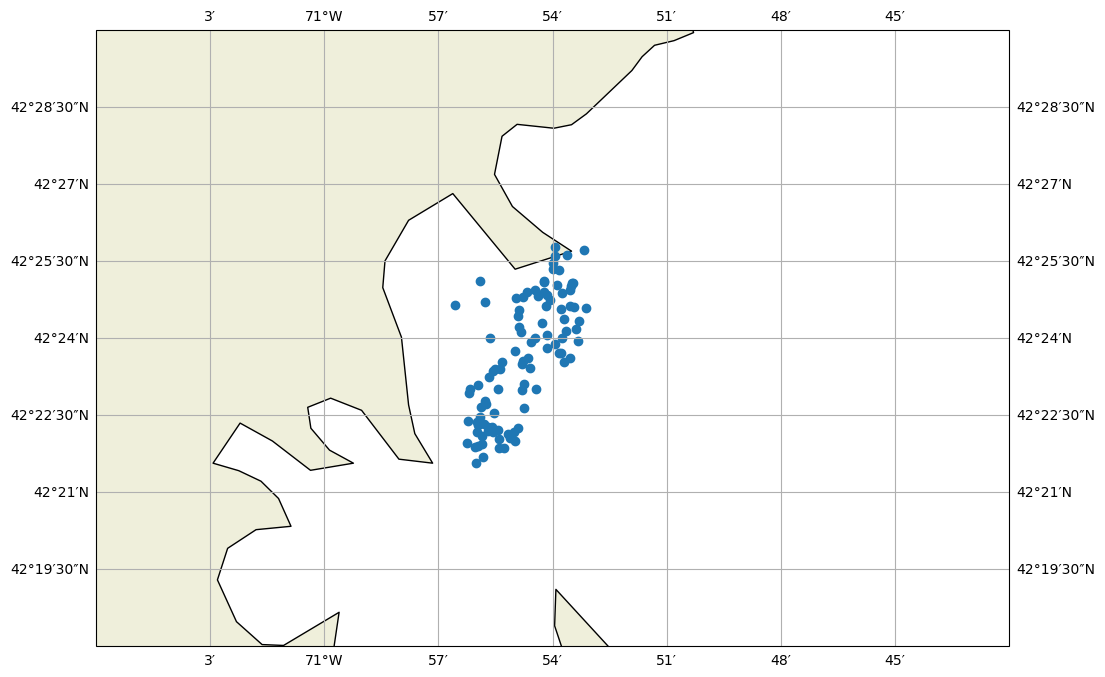

In [8]:
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent((-71.1, -70.7, 42.3, 42.5),)
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='10m')

ax.plot(positions['longitude'], positions['latitude'], 'o', transform=ccrs.PlateCarree())  # PlateCarree is lon,lat, essentially.

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()

In [9]:
# plot the path of a particular particle
trajectory = r.get_individual_trajectory(15)


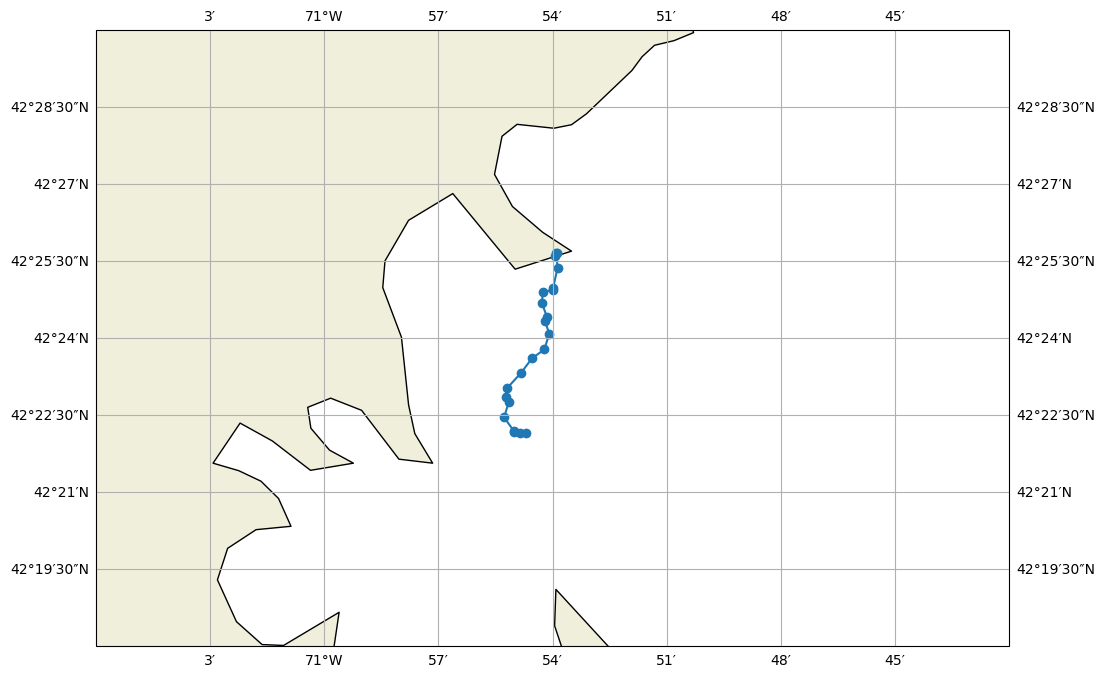

In [10]:
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent((-71.1, -70.7, 42.3, 42.5),)
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='10m')

ax.plot(trajectory['longitude'].data,
        trajectory['latitude'].data,
        'o-',
        transform=ccrs.PlateCarree())  # PlateCarree is lon,lat, essentially.

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()
